# Case Study 4

## PyTorch Imports

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim

## Standard Imports

In [9]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, root_mean_squared_error, mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, root_mean_squared_log_error

# Data Description

In [10]:
bikes = pd.read_csv('./Module 4/bikes.csv')
display(bikes.describe())
display(bikes.info())

,hr,casual,registered,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday
count,112475.000000,112475.000000,112475.000000,112475.000000,112475.000000,112475.000000,112475.000000,112475.000000,112475.000000,112475.000000,112475.000000
mean,11.501098,90.434612,249.193625,15.376487,14.659325,0.636624,13.100614,1.405441,2.495799,0.030300,0.684312
std,6.921864,128.655621,258.267544,9.749467,11.428324,0.190328,7.857600,0.683450,1.101152,0.171412,0.464791
min,0.000000,0.000000,0.000000,-14.700000,-24.000000,0.088900,0.000000,1.000000,1.000000,0.000000,0.000000
25%,6.000000,7.000000,48.000000,7.600000,5.400000,0.484100,7.700000,1.000000,2.000000,0.000000,0.000000
50%,12.000000,36.000000,180.000000,16.000000,16.000000,0.640900,12.200000,1.000000,2.000000,0.000000,1.000000
75%,18.000000,122.000000,360.000000,23.500000,23.500000,0.798800,17.500000,2.000000,3.000000,0.000000,1.000000
max,23.000000,1244.000000,1702.000000,40.500000,49.600000,1.000000,69.800000,4.000000,4.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112475 entries, 0 to 112474
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   dteday        112475 non-null  object 
 1   hr            112475 non-null  float64
 2   casual        112475 non-null  int64  
 3   registered    112475 non-null  int64  
 4   temp_c        112475 non-null  float64
 5   feels_like_c  112475 non-null  float64
 6   hum           112475 non-null  float64
 7   windspeed     112475 non-null  float64
 8   weathersit    112475 non-null  int64  
 9   season        112475 non-null  int64  
 10  holiday       112475 non-null  int64  
 11  workingday    112475 non-null  int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 10.3+ MB


None

# Matrix Plots

In [11]:
prntp_plt = False
if prntp_plt:
    sns.pairplot(data=bikes)
    plt.savefig('.\\Module 4\\matrix_plot.png', dpi=300)
    sns.pairplot(data=bikes.drop(columns='casual'), hue='registered')
    plt.savefig('.\\Module 4\\matrix_plot_registered.png', dpi=300)
    sns.pairplot(data=bikes.drop(columns='registered'), hue='casual')
    plt.savefig('.\\Module 4\\matrix_plot_casual.png', dpi=300)
else:
    print("Matrix Plot not being printed! It can take about 16 minutes to print and save them all.")

Matrix Plot not being printed! It can take about 16 minutes to print and save them all.


# Data Engineering

## Helper Functions

In [12]:
def create_weekday(s):
    s_obj = datetime.datetime.strptime(s, "%m/%d/%Y")
    s_day = s_obj.strftime("%a")
    return day_map[s_day]

day_map = {
    'Sun': 0,
    'Mon': 1,
    'Tue': 2,
    'Wed': 3,
    'Thu': 4,
    'Fri': 5,
    'Sat': 6
}

## Application of Functions

Applies functions and scales the data, also sets the random states for splitting the data and the model's random state

In [ ]:
# Add buffers to holidays
# add cyclic attributes for days and years

bikes['weekday'] = bikes['dteday'].map(create_weekday)
X = bikes.drop(columns=['dteday', 'casual', 'registered'])
y = bikes[['casual', 'registered']]

norm = MinMaxScaler().fit(X)
X_scaled = norm.transform(X)
r_state = 117
r_state_m = 117

# Tensor Flow Method

Tensor Flow versions newer than TF 2.10 refuse to use the gpu except by extensive configuration with WSL2. This is solely bound to CPU since it is running a newer version of TF. A successful attempt using TF on GPU from version 2.10 ran slower than CPU using TF 2.18 hence not bothering with the GPU with TF at this time.

## Train Test Split

In [20]:
X_tensor_trn, X_tensor_tst, y_tensor_trn, y_tensor_tst = train_test_split(X_scaled, y, test_size=0.2, random_state=r_state)

## Building the Nueral Network

In [21]:
model = keras.Sequential()
model.add(layers.Dense(128, input_dim=len(X_tensor_trn[0]), activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(.33))
model.add(layers.Dense(64, activation='leaky_relu'))
# model.add(layers.Dropout(.15))
model.add(layers.Dense(2, activation='relu'))

C:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,010 (199.26 KB)

 Trainable params: 51,010 (199.26 KB)

 Non-trainable params: 0 (0.00 B)

### Training

In [23]:
opt = keras.optimizers.Adam()
model.compile(loss="mean_squared_error", optimizer=opt, metrics=['mse'])

In [24]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', patience=30)
history = model.fit(X_tensor_trn, y_tensor_trn, epochs=2000, validation_split=0.35, batch_size=20, callbacks=[early_stop], shuffle=False)
hist = pd.DataFrame(history.history)

Epoch 1/2000
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 33580.4531 - mse: 33580.4531 - val_loss: 22201.2051 - val_mse: 22201.2051
Epoch 2/2000
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 21687.5117 - mse: 21687.5117 - val_loss: 19653.7461 - val_mse: 19653.7461
Epoch 3/2000
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 19503.7246 - mse: 19503.7246 - val_loss: 17367.9414 - val_mse: 17367.9414
Epoch 4/2000
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 16793.2812 - mse: 16793.2812 - val_loss: 14623.8809 - val_mse: 14623.8809
Epoch 5/2000
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 14359.1162 - mse: 14359.1162 - val_loss: 13095.7861 - val_mse: 13095.7861
Epoch 6/2000
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 13187.0938 - mse: 13187.0928 - val_loss: 13002.2744 - val_mse: 13002.2744
Epoch 7/2000
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 12710.7324 - mse: 12710.7324 - val_loss: 12096.6191 - val_mse: 12096.6191
Epoch 8/2000
2925/2925 ━━━━━━━━━━━

In [25]:
hist

,loss,mse,val_loss,val_mse
0,27995.912109,27995.912109,22201.205078,22201.205078
1,21265.402344,21265.402344,19653.746094,19653.746094
2,19039.931641,19039.931641,17367.941406,17367.941406
3,16245.524414,16245.524414,14623.880859,14623.880859
4,14200.916992,14200.917969,13095.786133,13095.786133
...,...,...,...,...
111,10386.304688,10386.304688,10497.940430,10497.941406
112,10368.610352,10368.610352,10590.328125,10590.328125
113,10346.047852,10346.047852,10453.064453,10453.065430
114,10333.787109,10333.787109,10451.529297,10451.529297


In [26]:
hist = hist.reset_index()

## Describing the Results

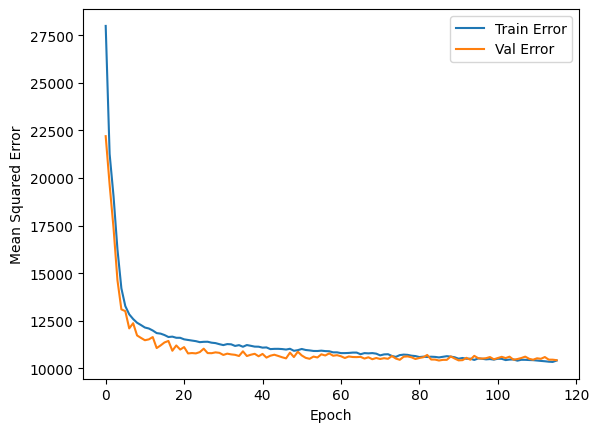

In [27]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.plot(hist['index'], hist['mse'], label='Train Error')
plt.plot(hist['index'], hist['val_mse'], label='Val Error')
plt.legend()

In [28]:
preds = np.round(model.predict(X_tensor_tst),1)
# preds = model.predict(X_test)

703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  


In [ ]:
X_test

In [29]:
result = root_mean_squared_error(y_tensor_tst, preds)
print(result)

99.00432062557685


In [30]:
r2 = r2_score(y_tensor_tst, preds)
print(r2)

0.7250456213951111


In [ ]:
results = pd.DataFrame(preds, columns=['casual', 'registered'])
results

,registered,casual
0,56.299999,210.899994
1,52.900002,138.300003
2,20.600000,39.000000
3,23.700001,212.100006
4,0.000000,35.099998
...,...,...
22490,341.899994,379.899994
22491,2.600000,0.000000
22492,57.799999,242.100006
22493,127.199997,445.500000


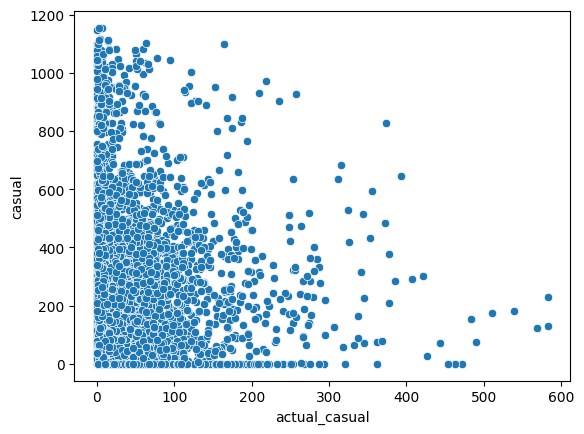

In [41]:
results['actual_casual'] = y_tensor_tst['casual']
results['actual_registered'] = y_tensor_tst['registered']

results['difference_casual'] = results['actual_casual']-results['casual']
results['difference_registered'] = results['actual_registered']-results['registered']

# xlims =(0,55)
ax = sns.scatterplot(data=results,x='actual_casual',y='casual')
# ax.plot(xlims,xlims, color='r')
plt.show()

# PyTorch Method

In [ ]:
device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda')